In [233]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt

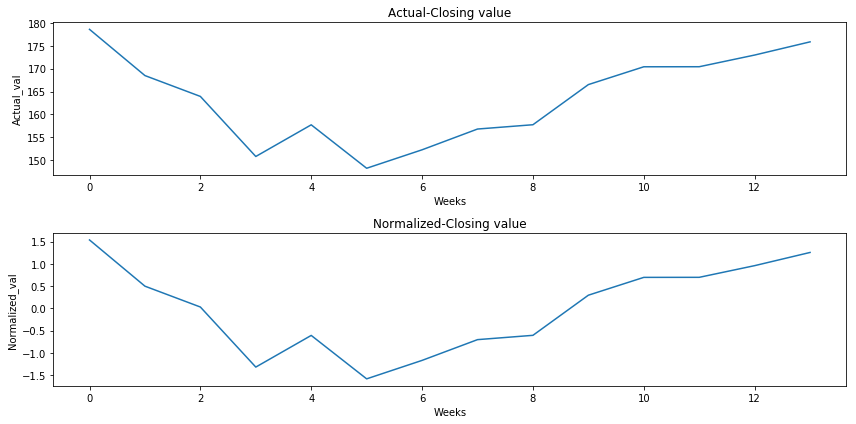

In [234]:
#step 1: Normalize the time series
df = pd.read_csv('/home/kiran/Desktop/AAPL.csv')
a = df['Close']
mvag = pd.DataFrame(a)
mean = mvag['Close'].mean()
std = mvag['Close'].std()
mvag['Normalized_TSeries'] = (mvag['Close'] - mean)/std
mvag.head()

plt.subplot(2,1,2)
mvag['Normalized_TSeries'].plot(title='Normalized-Closing value',figsize =(12,6))
plt.ylabel('Normalized_val')
plt.xlabel('Weeks')

plt.subplot(2,1,1)
mvag['Close'].plot(title='Actual-Closing value',figsize =(12,6))
plt.ylabel('Actual_val')
plt.xlabel('Weeks')
plt.tight_layout()

In [235]:
b = 0.10
n = mvag.shape[0]
print(n)
x = mvag['Normalized_TSeries']

14


In [236]:
#Step2 : Digitize the normalized time series and obtain the Chaincode
def Generate_Chaincode(x, n, b):
    Chaincode = []
    index = []
    p = int(x[1]/b + 0.5)
    Chaincode.append(2)
    index.append(0)
    i = 1
    while i <= n-1:
        q = int(x[i]/b + 0.5)
        if q == p:
            Chaincode.append(int(2))
            index.append(i)
        elif q > p:
            Chaincode.append(int(3))
            index.append(i)
            m = abs(int(q-p-1))
            if m != 0 and m > 0:
                Chaincode += m * [4]
                index += m * [i]
        else:
            Chaincode.append(int(1))
            index.append(i)
            m = abs(int(q-p-1))
            if m != 0 and m > 0:
                Chaincode += m * [0]
                index += m *[i]
        p = q
        i += 1
    return Chaincode,index
chaincode,index = Generate_Chaincode(x,n,b)
list1 = chaincode
print(list1)
print(index)

[2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 3, 4, 4, 3, 4, 4]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 12, 12, 12, 13, 13, 13]


Number of chain code is : 71
Number of Max and Min value is: 6


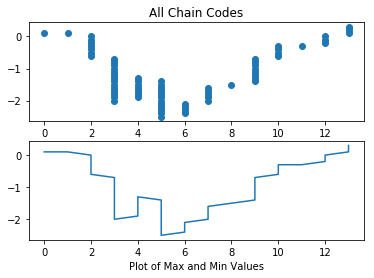

In [237]:
x = 0.10
for i in range(len(list1)):
    if i == 0:
        list1[i] = .10
    elif list1[i] == 0 or list1[i] == 1:
        list1[i] = list1[i-1]-0.10  
    elif list1[i] == 4 or list1[i] == 3:
        list1[i] = list1[i-1]+0.10
    else:
        list1[i] = list1[i-1]
Max   = []
Max_I = []
Min   = []
Min_I = []
vals = []
vals_I = []
pt = 0
l = len(list1)
for i in range(len(list1)):
    if i == 0:
        pt = list1[i]
        vals.append(list1[i])
        vals_I.append(index[i])
    elif i == l-1:
        pt = list1[i]
        vals.append(list1[i])
        vals_I.append(index[i])
    elif list1[i] > pt:
        pt = list1[i]
        if list1[i+1] <= pt:
            Max.append(list1[i])
            Max_I.append(i)
            vals.append(list1[i])
            vals_I.append(index[i])
    elif list1[i] < pt:
        pt = list1[i]
        if list1[i+1] >= pt:
            Min.append(list1[i])
            Min_I.append(i)
            vals.append(list1[i])
            vals_I.append(index[i])
Y = list1
X = [x for x in range(len(list1))]
plt.subplot(2,1,2)
plt.plot(index,list1,'-')
#plt.plot(vals_I,vals,'-')
plt.xlabel('Plot of Max and Min Values')
plt.subplot(2,1,1)
plt.plot(index,list1,'o')
#plt.plot(X,list1,'-')
plt.title('All Chain Codes')
print('Number of chain code is :', len(list1))
print('Number of Max and Min value is:',len(vals_I))


Comparison of ACTUAL WEEKLY VALUE and CHAINCODE's MAX and MIN


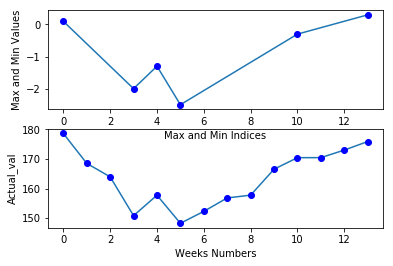

In [238]:
yx = [x for x in range(len(mvag['Close']))]
plt.subplot(2,1,2)
plt.plot(yx,mvag['Close'],'-')
plt.plot(yx,mvag['Close'],'o',color='b')
plt.ylabel('Actual_val')
plt.xlabel('Weeks Numbers')
plt.subplot(2,1,1)
plt.plot(vals_I,vals,'-')
plt.plot(vals_I,vals,'o',color='b',markersize = 6)
plt.ylabel('Max and Min Values')
plt.xlabel('Max and Min Indices')
print('')
print("Comparison of ACTUAL WEEKLY VALUE and CHAINCODE's MAX and MIN")


Number of Pro Max and Min value is: 5

comparison of ACTUAL WEEKLY VALUE and PROMINENT MIN and MAX Values


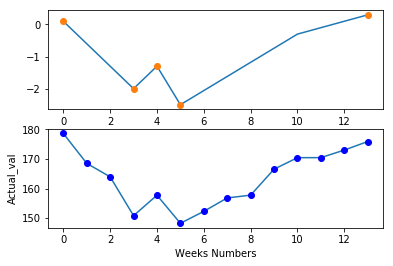

In [239]:
ProMaxMin = []
ProMaxMin_I = []
comp = []
temp = 0
avgR = 0
avgF = 0
avgRn = 0
avgFn = 0
r = 0
f = 0
for i in range(len(vals)):
    if i == 0:
        temp = vals[i]
        ProMaxMin.append(vals[i])
        ProMaxMin_I.append(vals_I[i])
    elif i == len(vals)-1:
        temp = vals[i]
        ProMaxMin.append(vals[i])
        ProMaxMin_I.append(vals_I[i])
    elif vals[i] > temp and i != len(vals):
        avg = (vals[i]/vals[i-1])-1
        avgR += avg
        avgRn = avgRn + 1
        temp = vals[i]
        if vals[i+1] < temp:
            r = avgR/avgRn
            if r > vals[i]:
                ProMaxMin.append(vals[i])
                ProMaxMin_I.append(vals_I[i])
    elif vals[i] < temp and i != len(vals):
        avg = (vals[i]/vals[i-1])-1
        avgF += avg
        avgFn = avgFn + 1
        temp = vals[i]
        if vals[i+1] > temp:
            f = avgF/avgFn
            if f < vals[i]:
                ProMaxMin.append(vals[i])
                ProMaxMin_I.append(vals_I[i])
print('')
print('Number of Pro Max and Min value is:',len(ProMaxMin))
yx = [x for x in range(len(mvag['Close']))]
plt.subplot(2,1,2)
plt.plot(yx,mvag['Close'],'-')
plt.plot(yx,mvag['Close'],'o',color='b')
plt.ylabel('Actual_val')
plt.xlabel('Weeks Numbers')
plt.subplot(2,1,1)
plt.plot(vals_I,vals,'-')
plt.plot(ProMaxMin_I,ProMaxMin,'o')
print('')
print('comparison of ACTUAL WEEKLY VALUE and PROMINENT MIN and MAX Values')